In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings 
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Loading the data

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# About the Dataset

* The dataset has been obtained from UCI Machine Learning Repository.

* The 'Revenue' attribute can be used as the class label.

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
* The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
* For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Problem Statement

To predict whether shoppers will complete a transaction based on their page activity.

# Data Understanding

In [3]:
data.shape

(12330, 18)

In [4]:
data.size

221940

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# The data has 12330 rows and 18 columns
# There are 2 categorical, 2 boolean and 14 numerical columns

In [7]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
data.describe(include='object').T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [11]:
data.describe(include='bool').T

,count,unique,top,freq
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


# Data Cleaning

In [12]:
# Checking for the presence of duplicates
data.duplicated().sum()

125

In [13]:
data[data.duplicated(keep=False)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [14]:
# There are 125 duplicates in the dataset
# But the UCI ML repository has specifically mentioned that each record refers a different user. Thus, not removing the  

# The dataset was formed so that each session
# would belong to a different user in a 1-year period to avoid
# any tendency to a specific campaign, special day, user
# profile, or period.

In [15]:
# Checking for any null values in the dataset
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [16]:
# There are no null values in the dataset

In [17]:
# Checking for data anomalies or inconsistencies

for i in data.columns:
    if data[i].dtype != 'object' and data[i].dtype != 'bool':
        print(i, data[i].nunique())
        print()

Administrative 27

Administrative_Duration 3335

Informational 17

Informational_Duration 1258

ProductRelated 311

ProductRelated_Duration 9551

BounceRates 1872

ExitRates 4777

PageValues 2704

SpecialDay 6

OperatingSystems 8

Browser 13

Region 9

TrafficType 20



In [18]:
for i in data.columns:
    if data[i].dtype != 'object' and data[i].dtype != 'bool':
        print(data[i].value_counts())
        print()

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64

Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: count, Length: 3335, dtype: int64

Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64

Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
2

In [19]:
# There are no anomalies in the data

# Exploratory Data Analysis

In [3]:
num = data.select_dtypes(include=np.number).columns.to_list()
cat = data.select_dtypes(exclude=np.number).columns.to_list()

In [4]:
num.remove('Browser')
num.remove('Region')
num.remove('TrafficType')
num.remove('OperatingSystems')

In [5]:
cat.extend(['Browser','Region','TrafficType', 'OperatingSystems'])

# Univariate Analysis

In [23]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


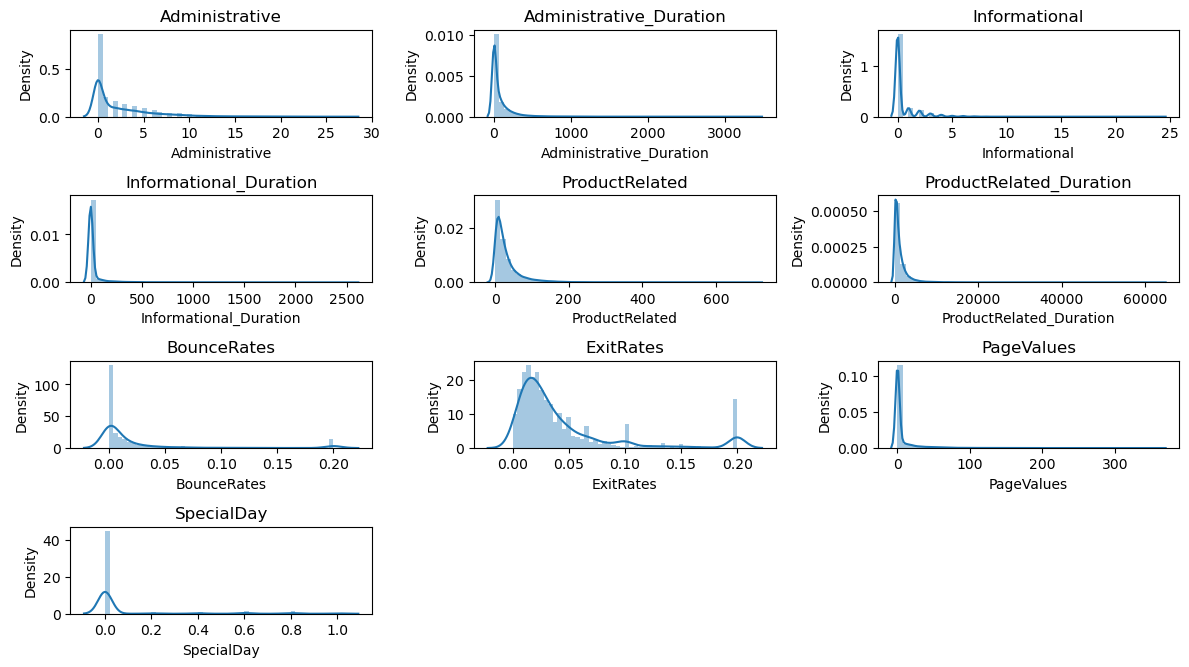

In [24]:
t=1
for i in num:
    plt.subplot(5,3,t)
    sns.distplot(data[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

Administrative 
 skewness:  1.96 , kurtosis:  4.701
Administrative_Duration 
 skewness:  5.616 , kurtosis:  50.557
Informational 
 skewness:  4.036 , kurtosis:  26.932
Informational_Duration 
 skewness:  7.579 , kurtosis:  76.317
ProductRelated 
 skewness:  4.342 , kurtosis:  31.212
ProductRelated_Duration 
 skewness:  7.263 , kurtosis:  137.174
BounceRates 
 skewness:  2.948 , kurtosis:  7.723
ExitRates 
 skewness:  2.149 , kurtosis:  4.017
PageValues 
 skewness:  6.383 , kurtosis:  65.636
SpecialDay 
 skewness:  3.303 , kurtosis:  9.914


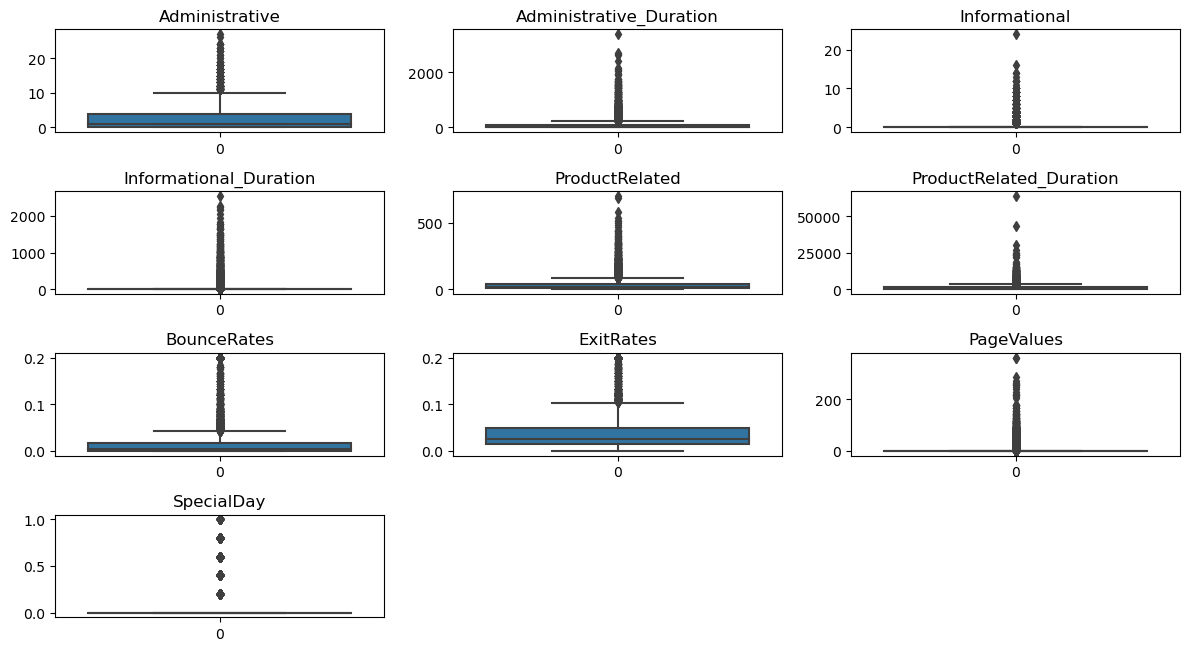

In [25]:
t=1
for i in num:
    print(i, '\n skewness: ', round(data[i].skew(),3), ', kurtosis: ', round(data[i].kurt(), 3))
    plt.subplot(5,3,t)
    sns.boxplot(data[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [26]:
for i in cat:
    print(data[i].value_counts())
    print()
    print('*********************')

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

*********************
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

*********************
Weekend
False    9462
True     2868
Name: count, dtype: int64

*********************
Revenue
False    10422
True      1908
Name: count, dtype: int64

*********************
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

*********************
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

*********************
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40


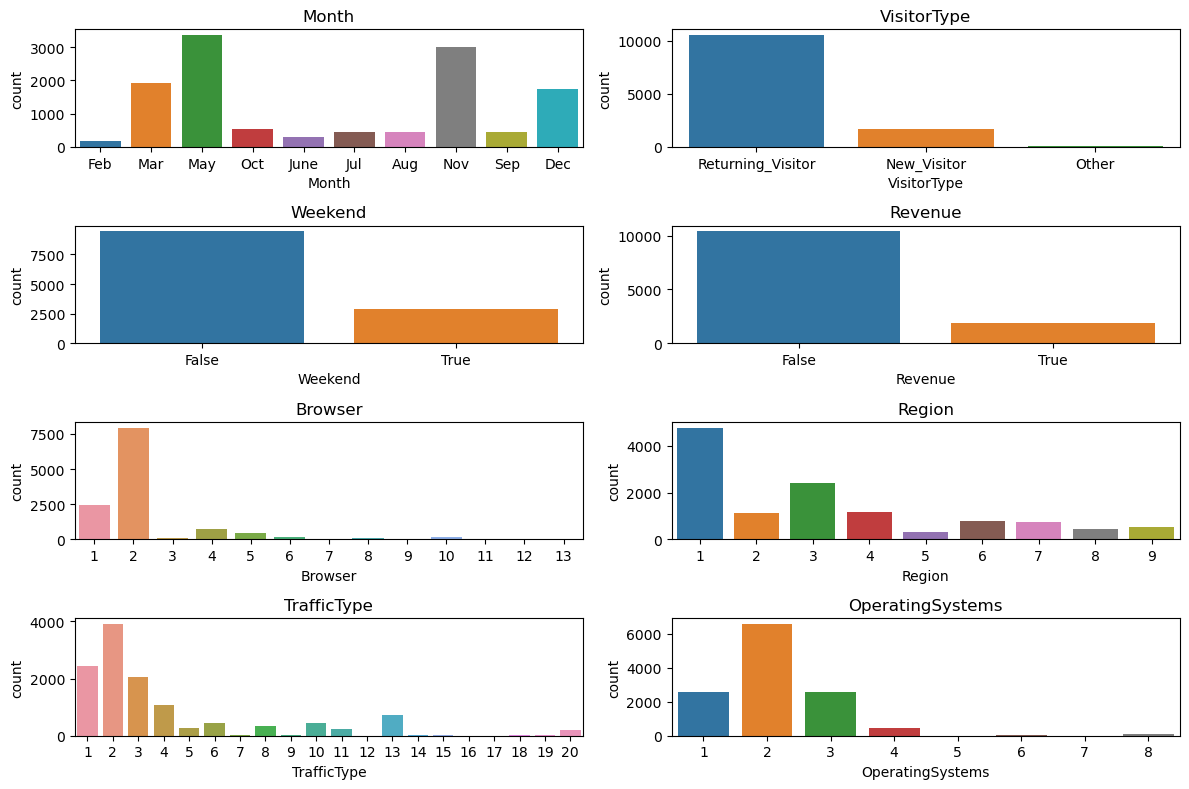

In [27]:
t=1
for i in cat:
    plt.subplot(4,2,t)
    sns.countplot(data = data, x=i)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# Insights:
* The columns are right skewed with mean > median.
* Among the web pages, the product related web page has higher number of visits and visit duration.
* May and November months have higher page visits.
* February has the least page visits.
* The number of web page visits are higher on weekdays rather than weekends.
* Browser 2 is the most common browser through which the visitors access the page.
* Traffic types most common are 2, 1 and 3.
* The higher number of page visits is by a returning vistor and not a new visitor.
* Most of the page visits does not lead to purchases.
* Region 1 has more number of page visits.
* Operating system that is most common is 2.

# Bivariate Analysis

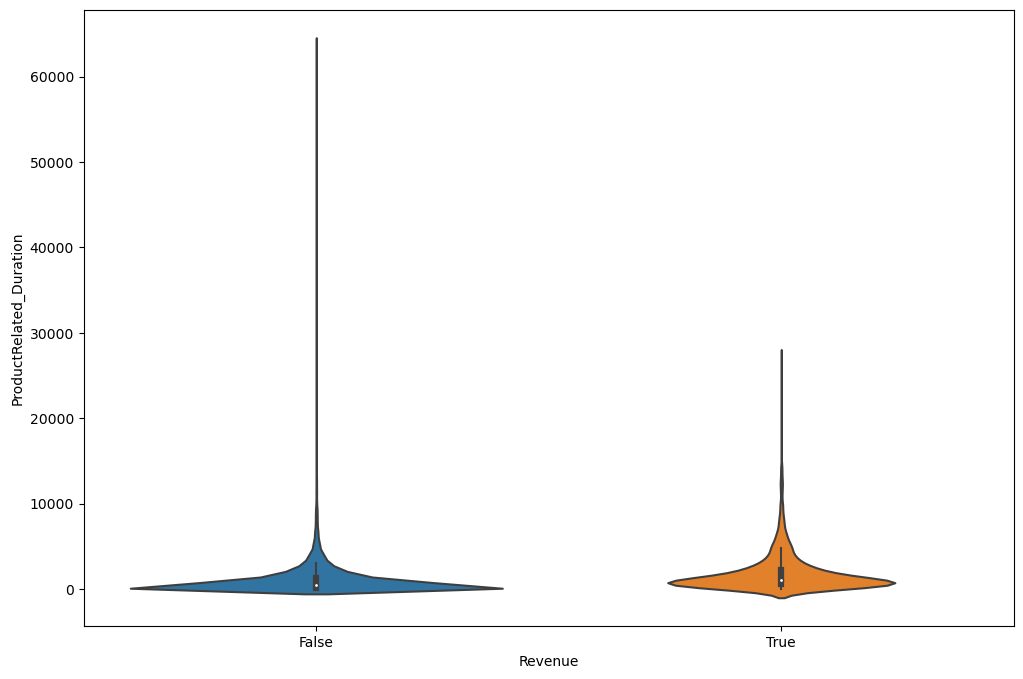

In [44]:
sns.violinplot(data=data, y='ProductRelated_Duration', x='Revenue')
plt.show()

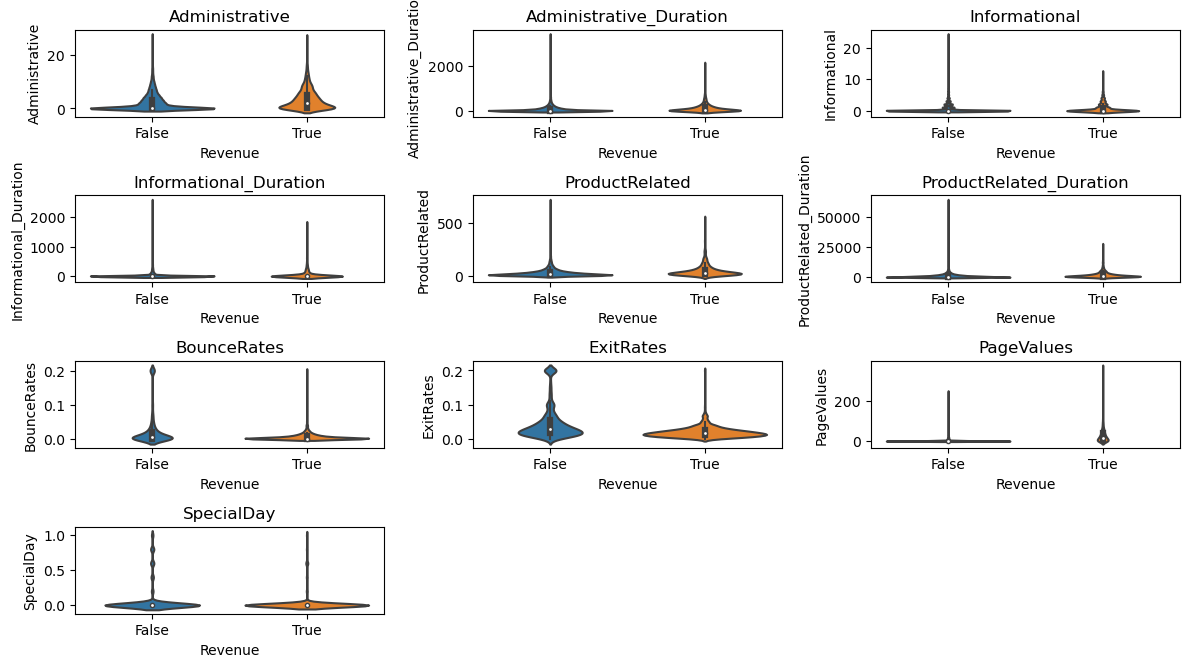

In [46]:
t=1
for i in num:
    plt.subplot(5,3,t)
    sns.violinplot(data=data, y=i, x='Revenue')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

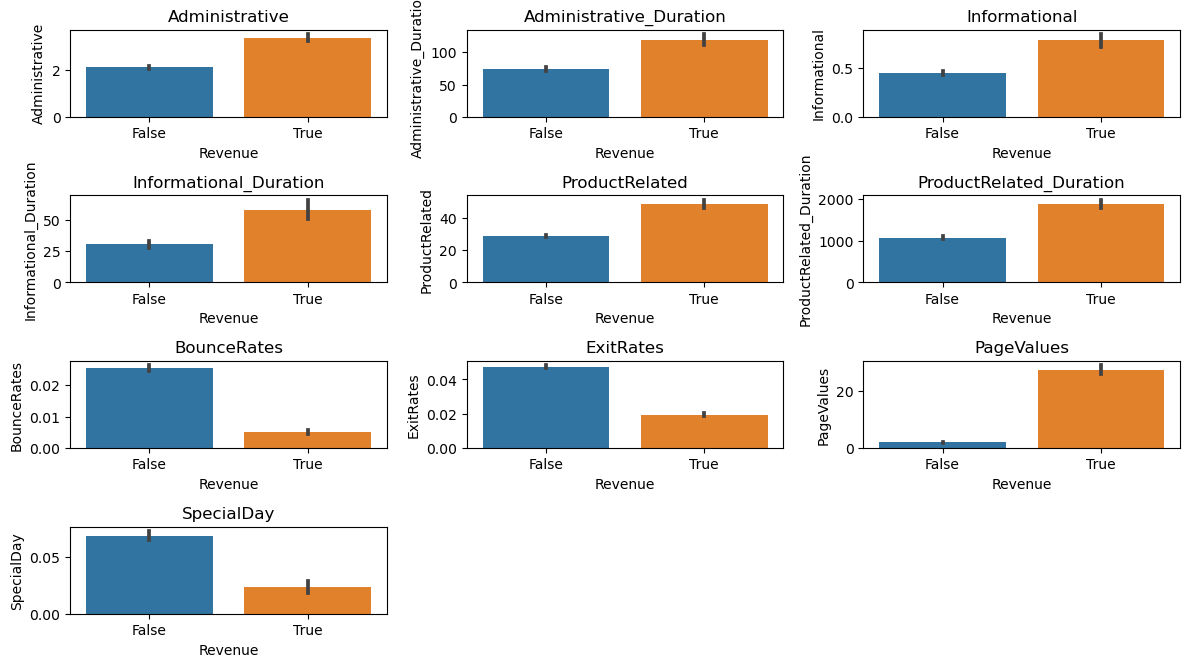

In [30]:
t=1
for i in num:
    plt.subplot(5,3,t)
    sns.barplot(data=data, y=i, x='Revenue')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

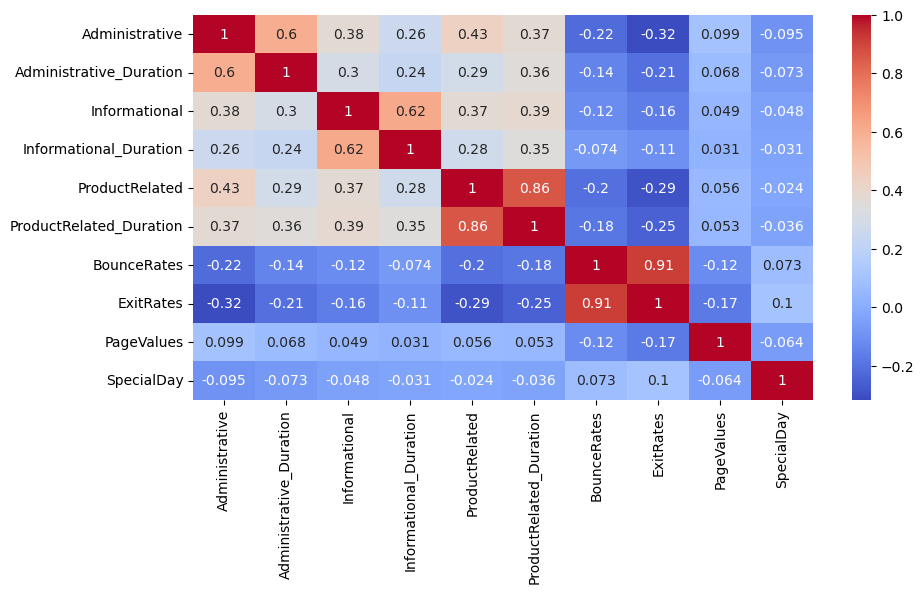

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(data[num].corr(), cmap='coolwarm', annot=True)
plt.show()

In [32]:
# Bounce rates and Exit rates are highly positively correlated

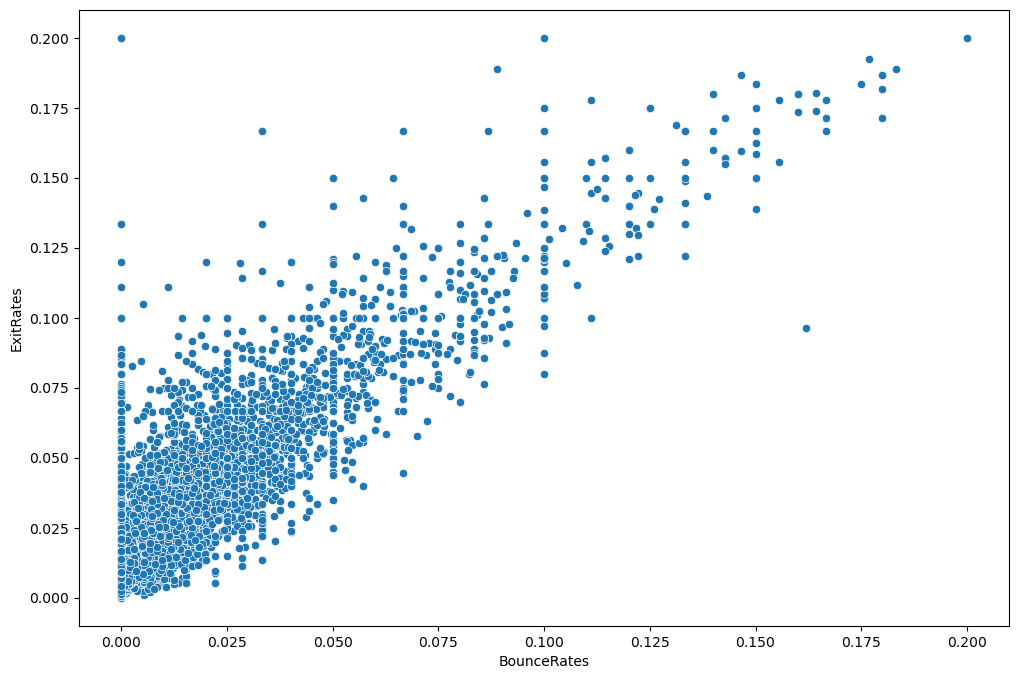

In [33]:
sns.scatterplot(data=data, x='BounceRates', y='ExitRates')
plt.show()

* This suggests that the pages with higher bounce rates are the exit pages from which the visitors exit from the site.
* In essence, pages that users visit and then leave immediately (high bounce rate) are also the pages where many users end their sessions (high exit rate). 
* This often indicates that these pages may not be engaging enough or may not meet user expectations, leading to both high bounce and exit rates.

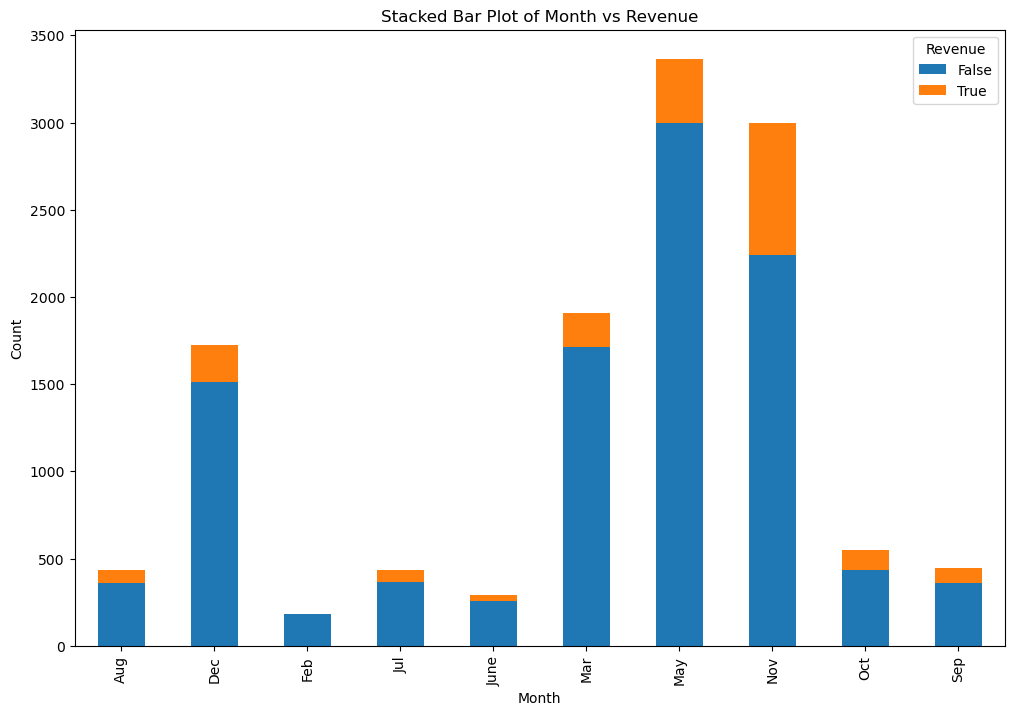

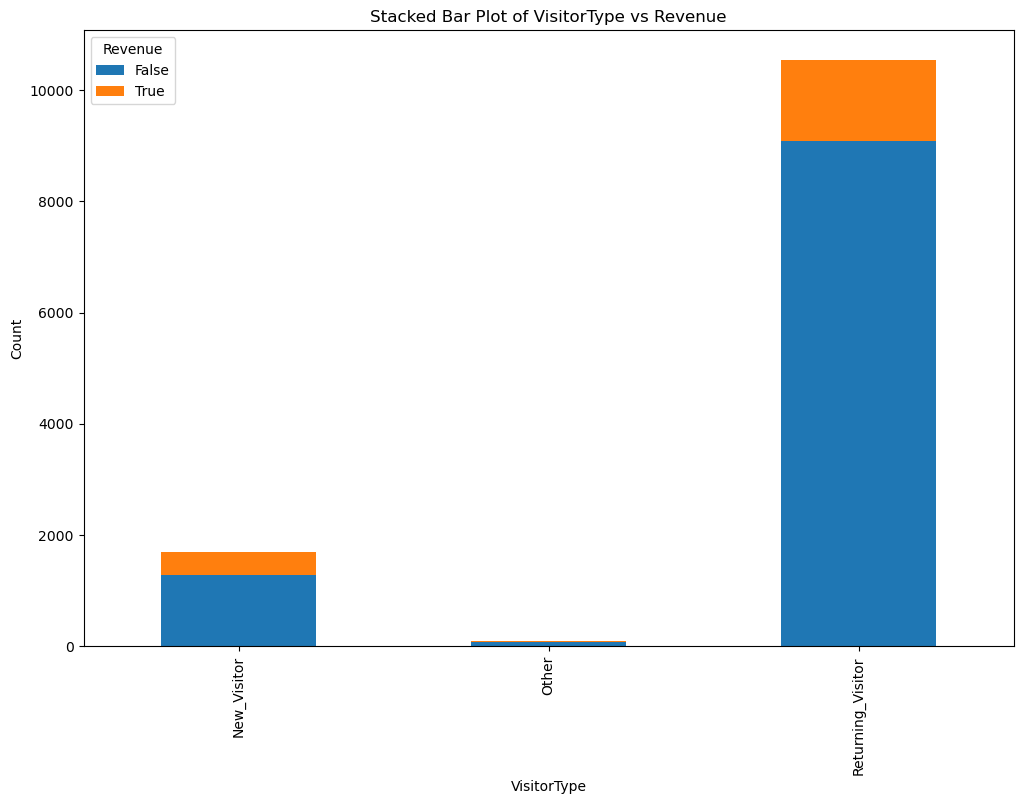

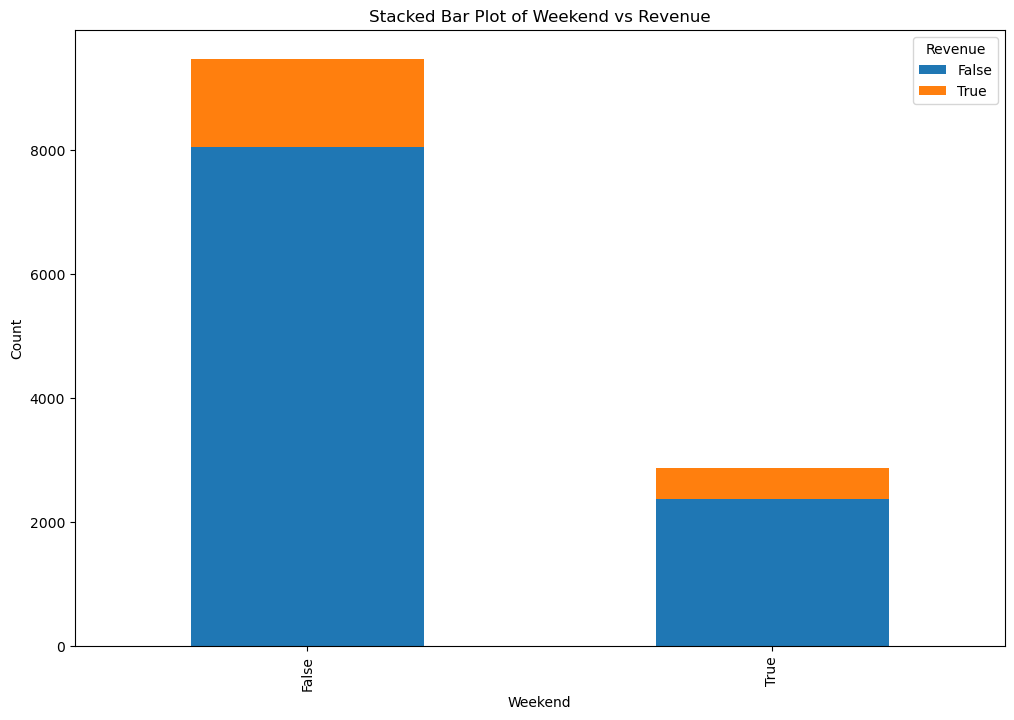

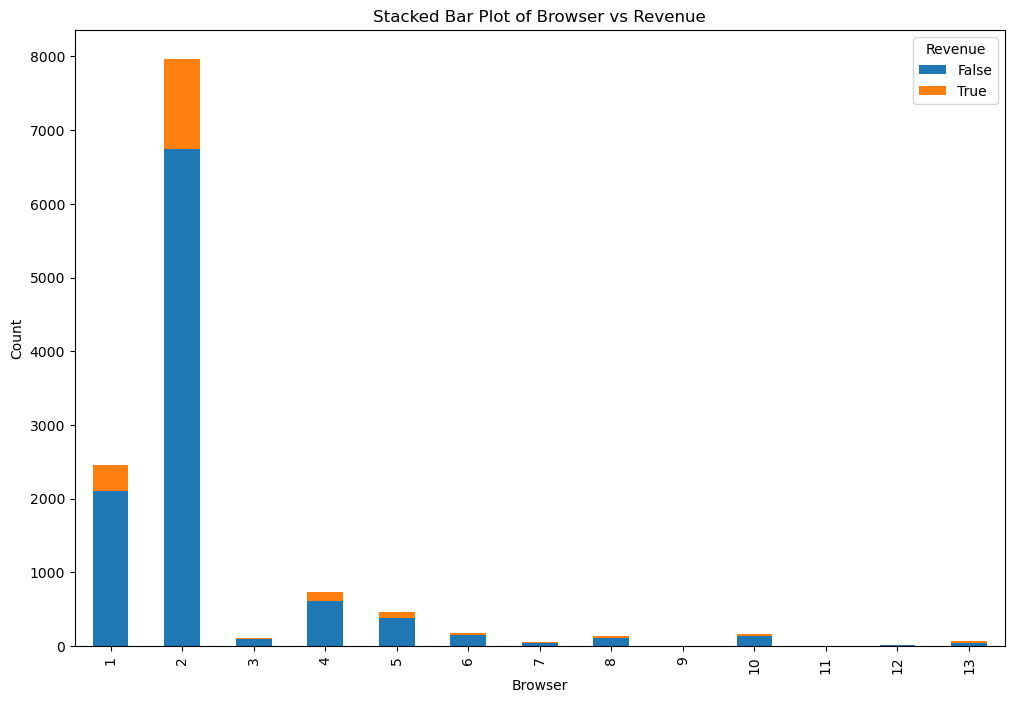

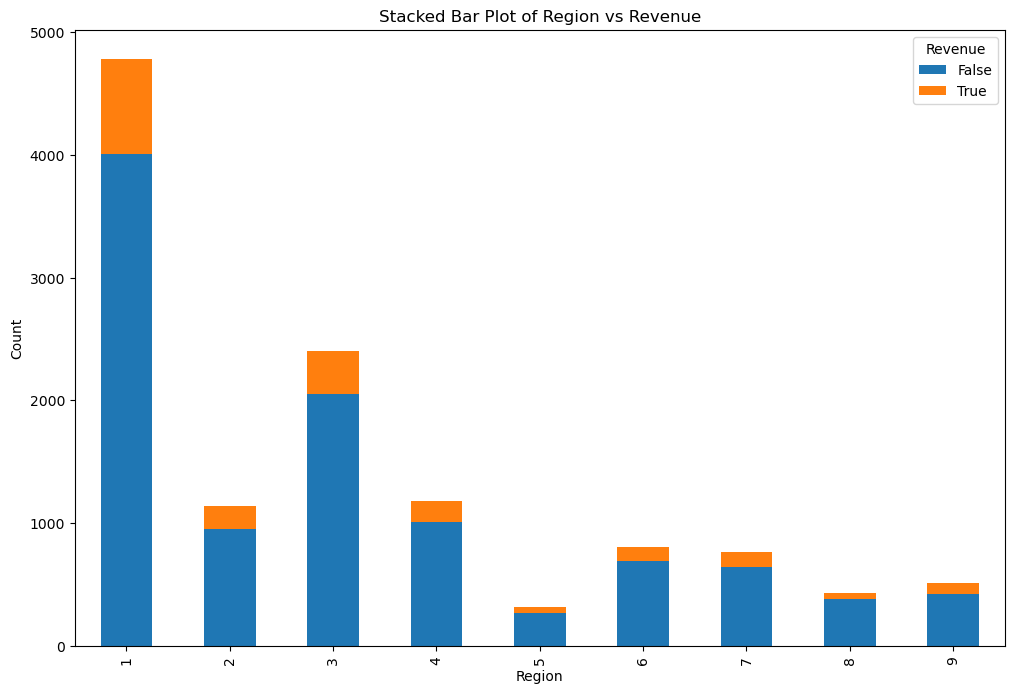

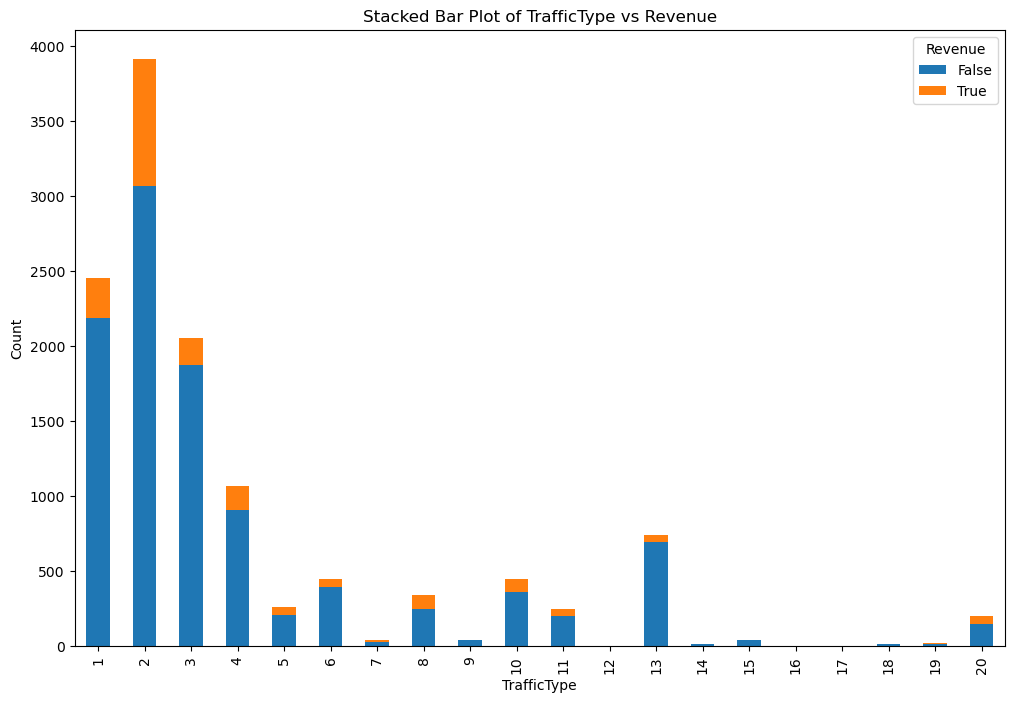

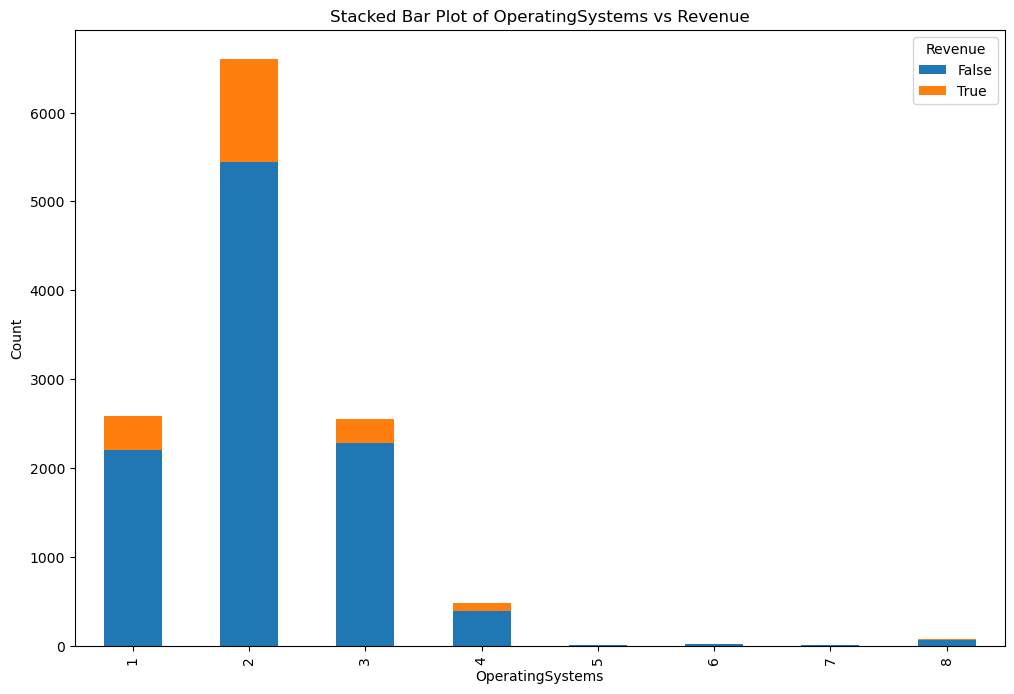

In [34]:
for i in cat:
    if i != 'Revenue':
        crosstab = pd.crosstab(data[i], data['Revenue'])
        crosstab.plot(kind='bar', stacked=True)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f'Stacked Bar Plot of {i} vs Revenue')
        plt.show()
        t+=1
plt.show()

* Even if the number of page visits is higher in May, the number of purchases occurred is high in November.

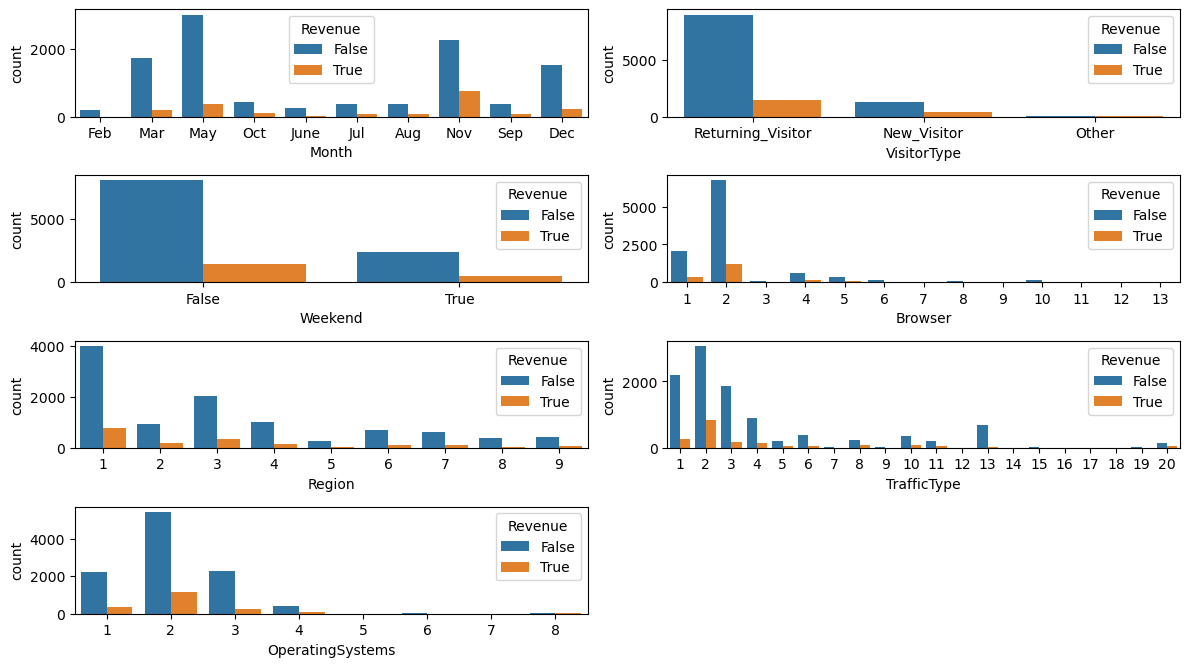

In [48]:
t=1
for i in cat:
    if i != 'Revenue':
        plt.subplot(5,2,t)
        sns.countplot(data=data, x=i, hue='Revenue')
        t+=1
plt.tight_layout()
plt.show()

# Data Preprocessing

In [52]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
# There are presence of outliers as evident from the boxplot.
# Outlier treatment like removing and capping is not preferred as they may not provide a true reflection of the real scenario.

# Encoding

In [ ]:
# columns like Revenue and weekend is of bool data type.
# columns like visitortype and Month is of categoric.
# Encoding them to numeric.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df = data.copy()

df['Revenue'] = df['Revenue'].replace({True:1, False:0})
df['Weekend'] = df['Weekend'].replace({True:1, False:0})

df['VisitorType'] = df['VisitorType'].replace({'Returning_Visitor':0, 'New_Visitor':1, 'Other':-1})

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Month'] = l.fit_transform(df[['Month']])

In [115]:
# df.drop(columns=['Revenue'], inplace=True)

In [116]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
dtype: object

# Data Partitioning

In [69]:
x = df.drop('Revenue', axis=1)
y = df['Revenue']

In [11]:
y.value_counts(normalize=True)*100

Revenue
0          84.525547
1          15.474453
Name: proportion, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(9864, 17) (9864, 1)
(2466, 17) (2466, 1)


# Base Model for Classification

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score

In [14]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [16]:
train_pred = dt.predict(xtrain)
test_pred = dt.predict(xtest)

In [27]:
train_pred_soft = dt.predict_proba(xtrain)[:,1]
test_pred_soft = dt.predict_proba(xtest)[:,1]

In [19]:
accuracy_score(ytrain, train_pred)

0.9090632603406326

In [20]:
accuracy_score(ytest, test_pred)

0.897404703974047

In [17]:
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8338
           1       0.78      0.57      0.66      1526

    accuracy                           0.91      9864
   macro avg       0.85      0.77      0.80      9864
weighted avg       0.90      0.91      0.90      9864



In [18]:
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.75      0.51      0.61       382

    accuracy                           0.90      2466
   macro avg       0.83      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466



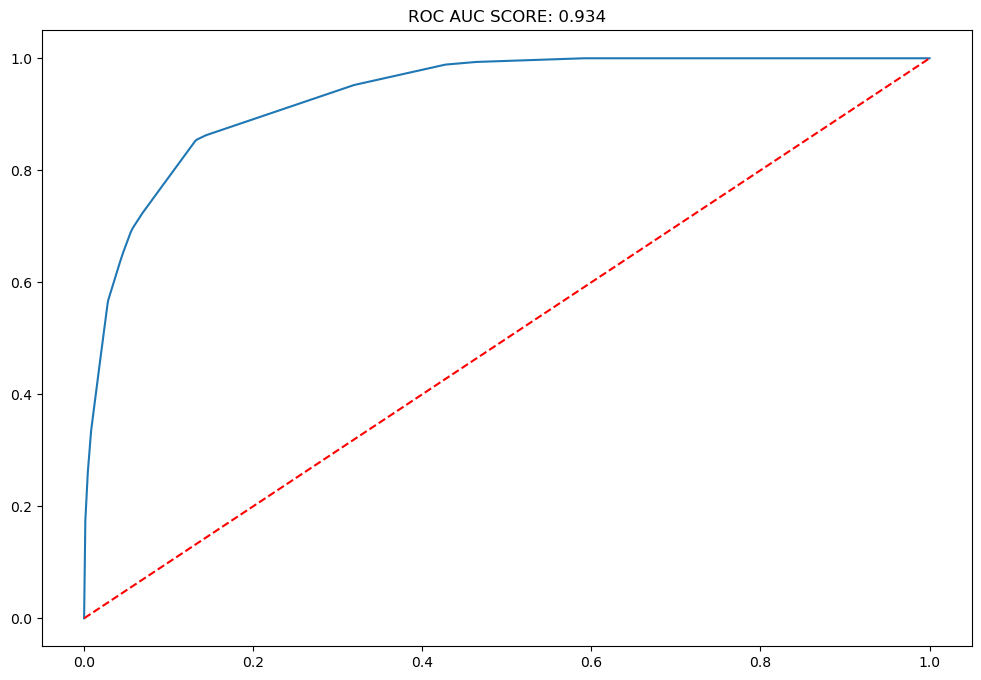

In [28]:
fpr, tpr, thres = roc_curve(ytrain, train_pred_soft)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], c='red', ls='--')
plt.title(f'ROC AUC SCORE: {round(roc_auc_score(ytrain, train_pred_soft), 3)}')
plt.show()

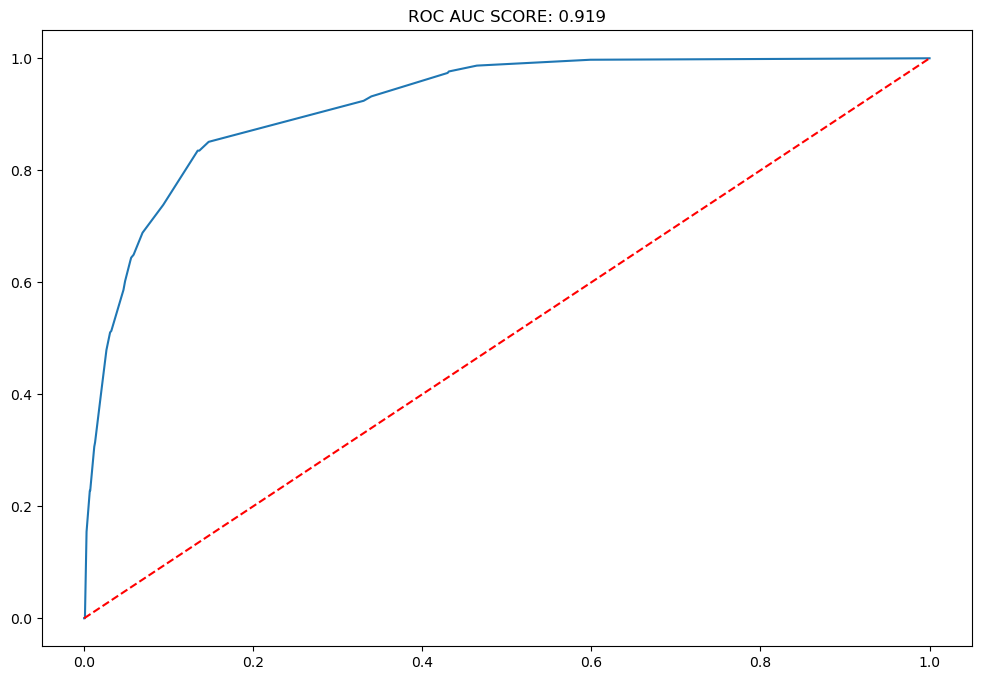

In [29]:
fpr, tpr, thres = roc_curve(ytest, test_pred_soft)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], c='red', ls='--')
plt.title(f'ROC AUC SCORE: {round(roc_auc_score(ytest, test_pred_soft), 3)}')
plt.show()

In [ ]:
# The train and test datasets do not show much variance and is not overfit
# f1 score for class 1 could be improved

# Finding the appropriate model

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
acc = []
pre = []
rec = []
f1 = []
ck = []
mod = []

def score(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred_hard = m.predict(xtest)
    pred_soft = m.predict_proba(xtest)[:,1]
    
    
    print(classification_report(ytest, pred_hard))
    fpr, tpr, thres = roc_curve(ytest, pred_soft)
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], ls='--', c='red')
    plt.title(f'ROC AUC SCORE: {round(roc_auc_score(ytest, pred_soft), 3)}')
    plt.show()
    
    inp = input('Save the model: Y/N ')
    if inp.lower() == 'y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest, pred_hard))
        pre.append(precision_score(ytest, pred_hard))
        rec.append(recall_score(ytest, pred_hard))
        f1.append(f1_score(ytest, pred_hard))
        ck.append(cohen_kappa_score(ytest, pred_hard))
        
        scorecard = pd.DataFrame(
            {'Model':mod, 
             'Accuracy': acc, 'Precision':pre,
             'Recall':rec, 'f1 score':f1,
             'Cohen Kappa':ck}
        )
    else:
        return

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.77      0.52      0.62       382

    accuracy                           0.90      2466
   macro avg       0.84      0.74      0.78      2466
weighted avg       0.89      0.90      0.89      2466



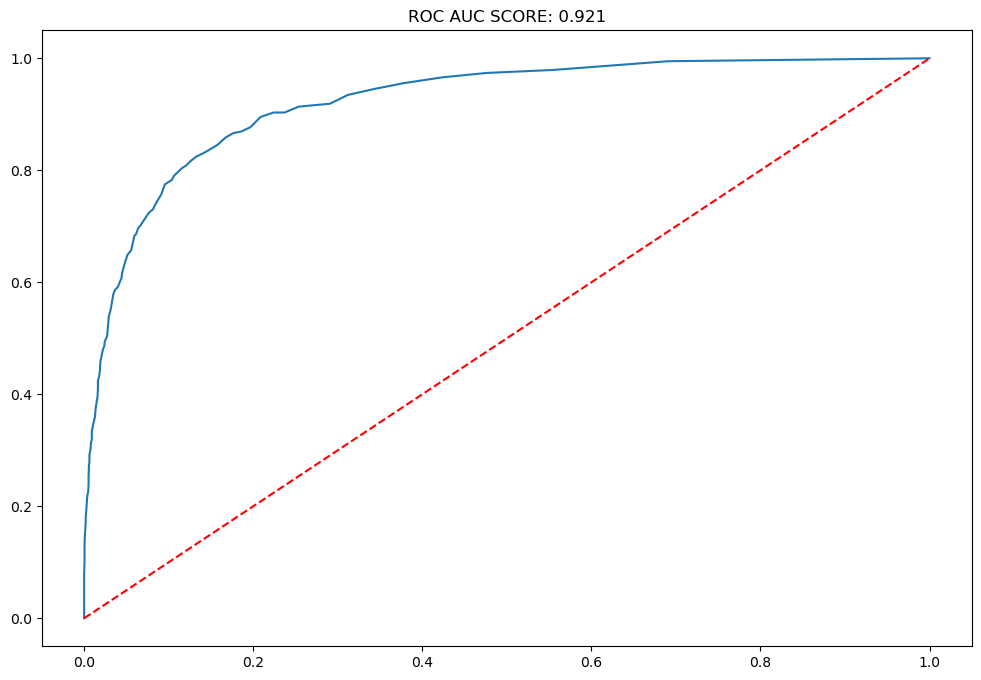

Save the model: Y/N y


In [83]:
score(RandomForestClassifier(), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2084
           1       0.50      0.53      0.51       382

    accuracy                           0.84      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.85      0.84      0.85      2466



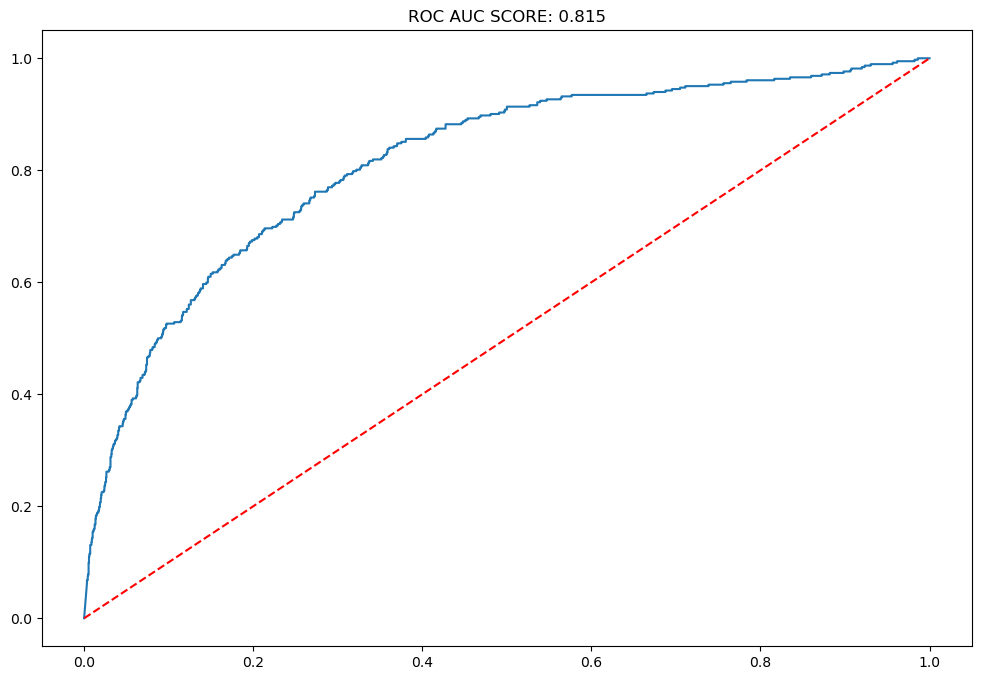

Save the model: Y/N y


In [84]:
score(GaussianNB(), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2084
           1       0.60      0.29      0.39       382

    accuracy                           0.86      2466
   macro avg       0.74      0.63      0.65      2466
weighted avg       0.84      0.86      0.84      2466



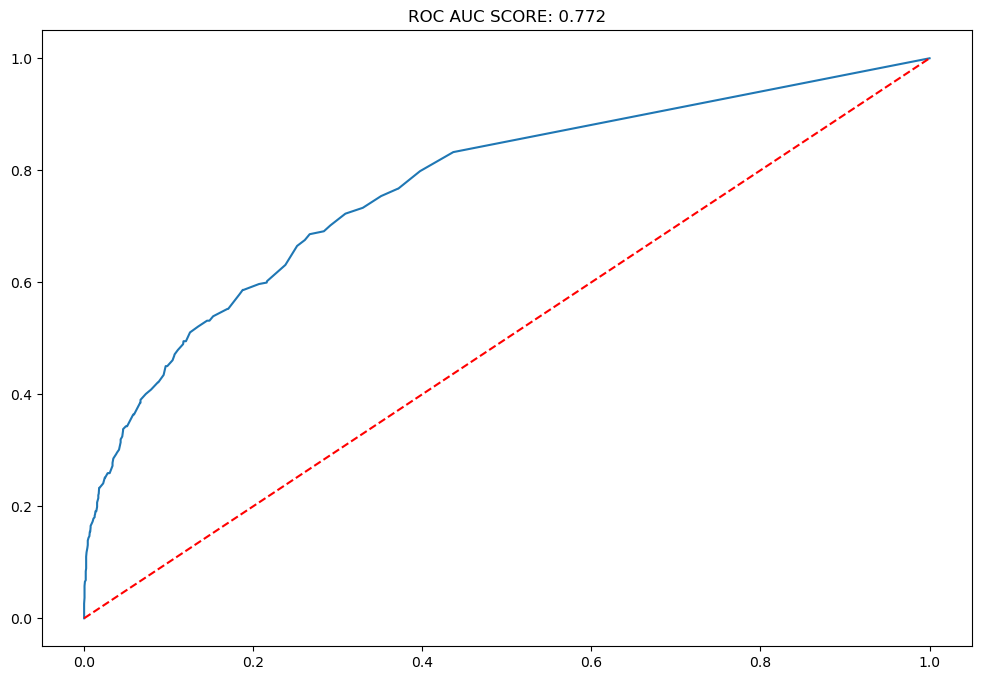

Save the model: Y/N n


In [85]:
score(BaggingClassifier(estimator=KNeighborsClassifier()), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2084
           1       0.49      0.52      0.51       382

    accuracy                           0.84      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.85      0.84      0.84      2466



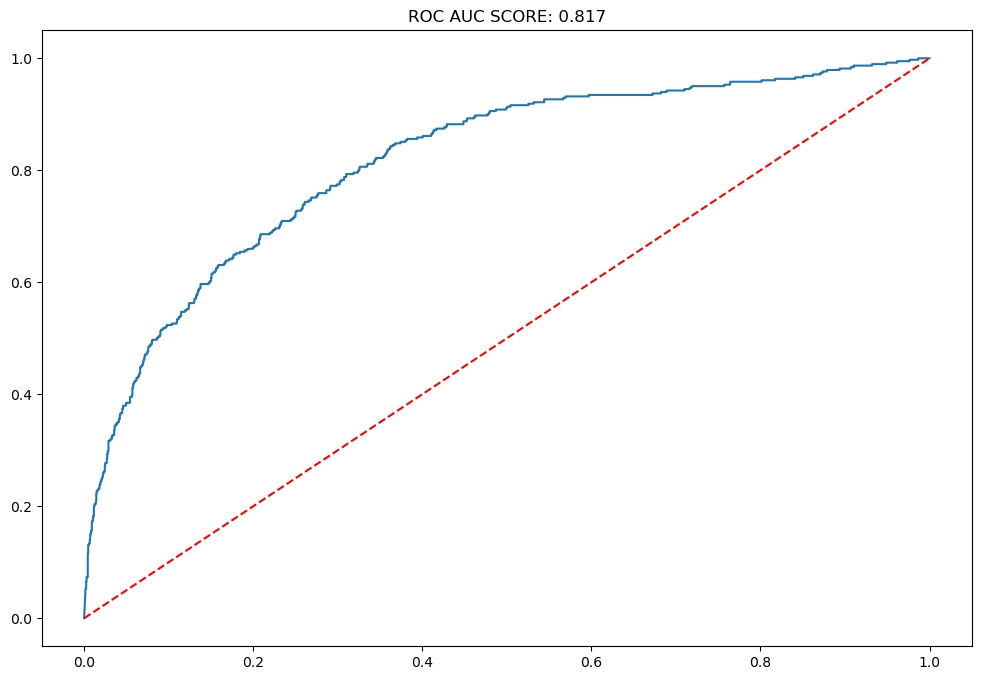

Save the model: Y/N y


In [86]:
score(BaggingClassifier(estimator=GaussianNB()), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2084
           1       0.55      0.54      0.55       382

    accuracy                           0.86      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



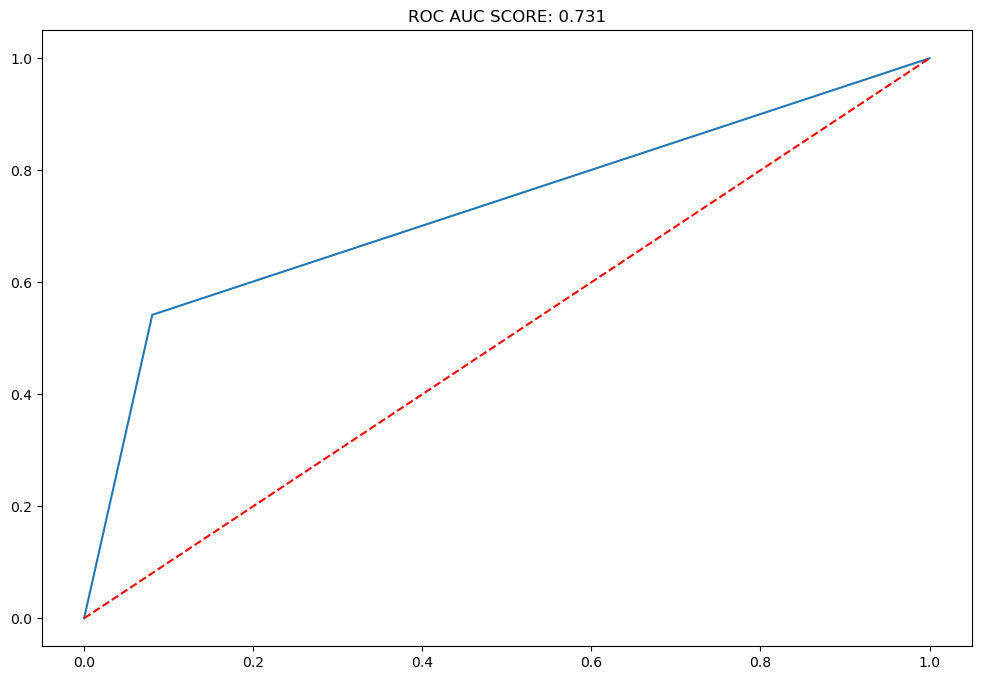

Save the model: Y/N n


In [87]:
score(AdaBoostClassifier(estimator=DecisionTreeClassifier()), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.70      0.55      0.61       382

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.78      2466
weighted avg       0.89      0.89      0.89      2466



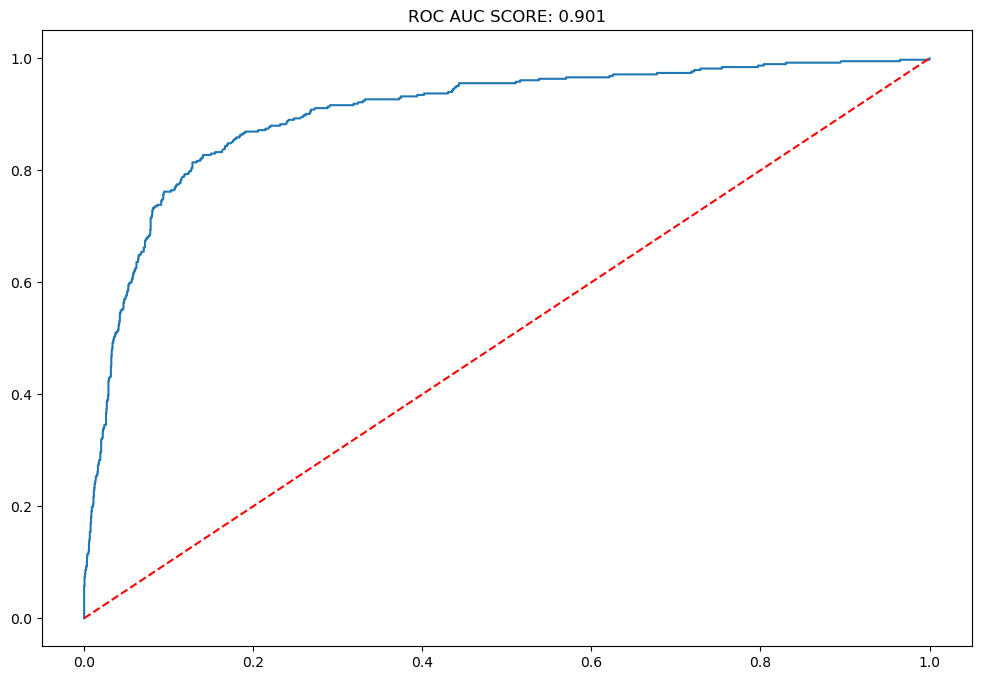

Save the model: Y/N y


In [89]:
score(AdaBoostClassifier(), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2084
           1       0.71      0.51      0.59       382

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



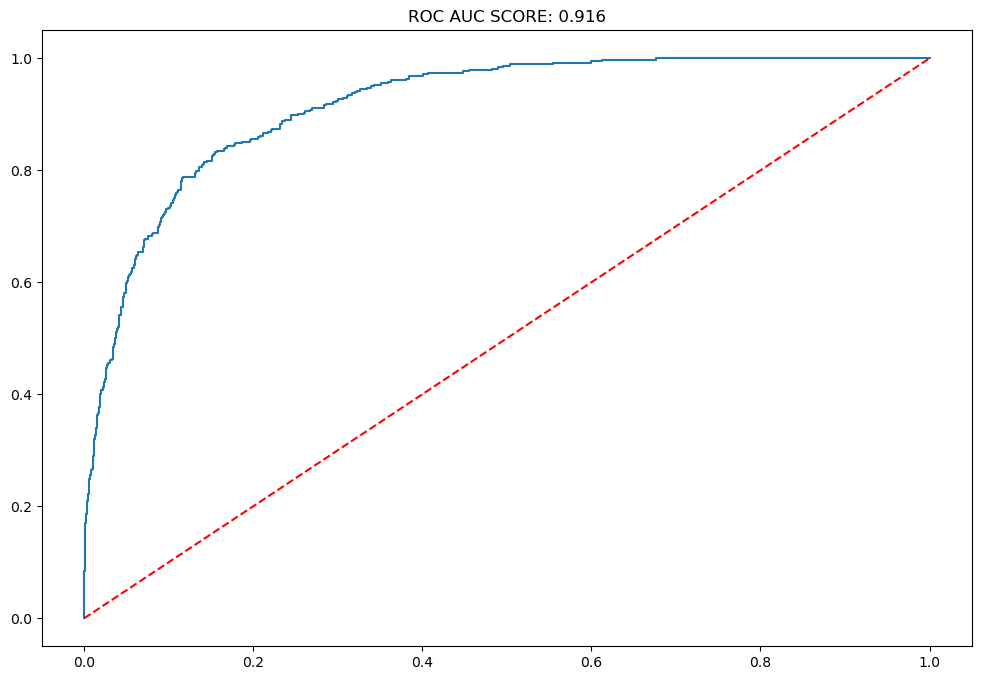

Save the model: Y/N y


In [90]:
score(XGBClassifier(), xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.75      0.51      0.61       382

    accuracy                           0.90      2466
   macro avg       0.83      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466



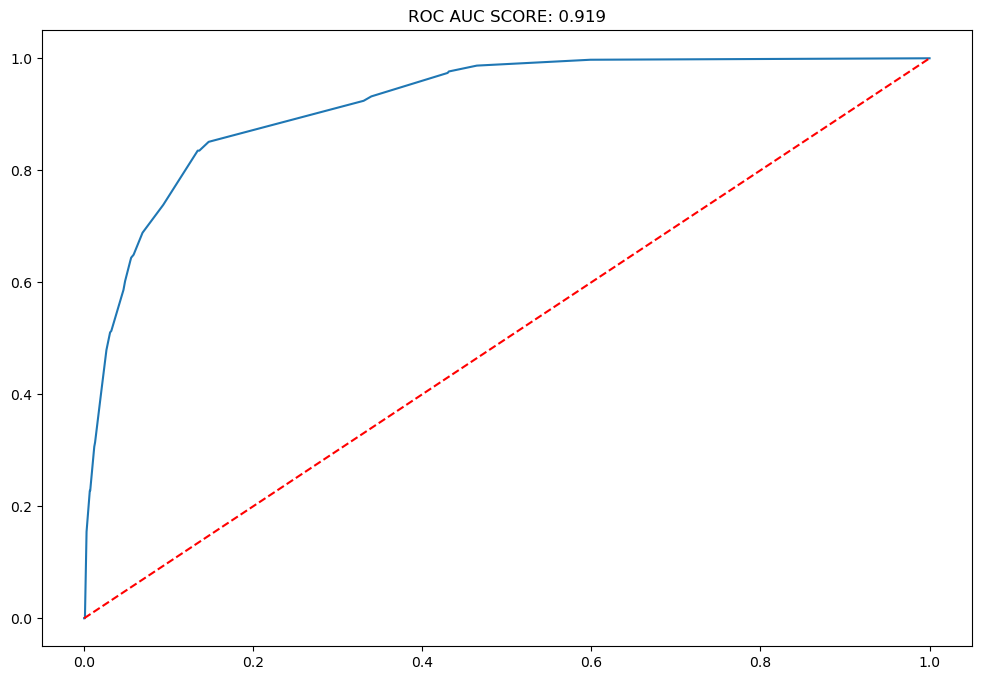

Save the model: Y/N y


In [94]:
score(DecisionTreeClassifier(max_depth=5), xtrain, ytrain, xtest, ytest)

In [95]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen Kappa
0,RandomForestClassifier(),0.901460,0.772549,0.515707,0.618524,0.564514
1,GaussianNB(),0.844282,0.497525,0.526178,0.511450,0.418917
2,BaggingClassifier(estimator=GaussianNB()),0.843066,0.493797,0.520942,0.507006,0.413765
3,AdaBoostClassifier(),0.893350,0.698997,0.547120,0.613803,0.552999
4,"XGBClassifier(base_score=None, booster=None, c...",0.891322,0.706522,0.510471,0.592705,0.531871
5,DecisionTreeClassifier(max_depth=5),0.897405,0.745247,0.513089,0.607752,0.551036


In [ ]:
# Choosing Random forest classifier and AdaBoost Classifier to improve by hyperparameter tuning

# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [96]:
est = RandomForestClassifier()
params = {'max_depth': range(4,10), 'criterion':['entropy', 'gini'], 'n_estimators': [50,75,100]}
gscv = GridSearchCV(estimator=est, cv=5, param_grid=params, scoring='f1', verbose=3)
gscv.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.405 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.514 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.446 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.475 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.395 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=75;, score=0.451 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=75;, score=0.551 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=75;, score=0.532 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=75;, score=0.421 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=75;, score=0.410 total time=   1.2

[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.627 total time=   3.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.652 total time=   3.2s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.681 total time=   3.1s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.441 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.562 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.472 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.502 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.599 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=75;, score=0.548 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=75;, score=0.552 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=75;, score=0.520 total 

[CV 3/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.622 total time=   3.0s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.640 total time=   3.0s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=100;, score=0.680 total time=   3.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 10),
                         'n_estimators': [50, 75, 100]},
             scoring='f1', verbose=3)

In [97]:
gscv.best_score_

0.6476509762240703

In [98]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.77      0.52      0.62       382

    accuracy                           0.90      2466
   macro avg       0.84      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



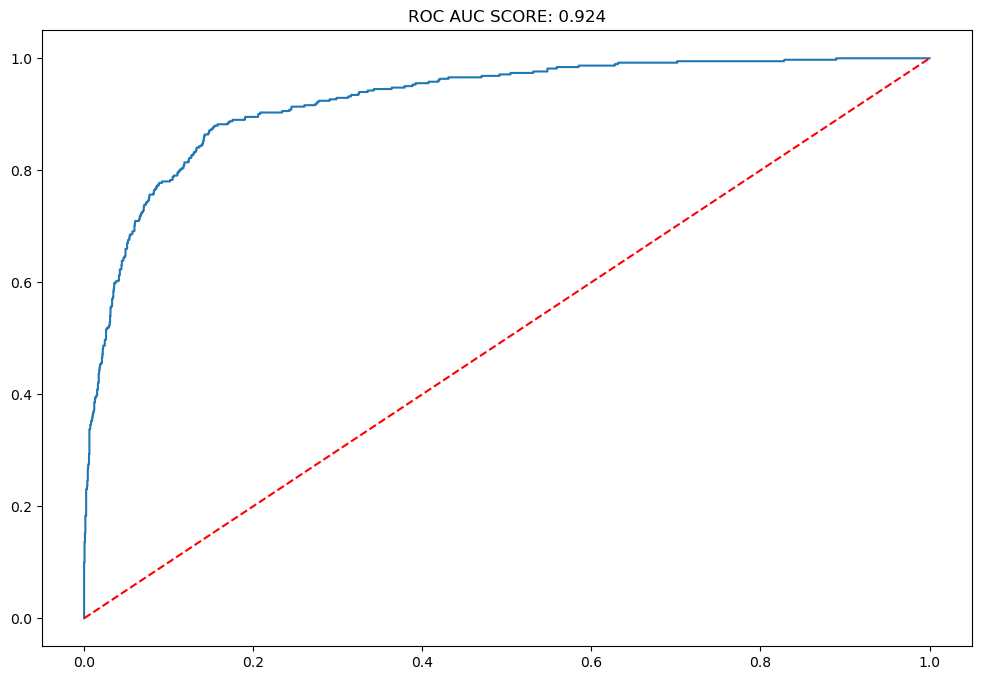

Save the model: Y/N y


In [99]:
score(RandomForestClassifier(**gscv.best_params_), xtrain, ytrain, xtest, ytest)

In [106]:
est = XGBClassifier()
params = {'max_depth': range(4,7), 'n_estimators': [50,75,100], 'learning_rate':[0.1, 0.01, 0.5, 1]}
gscv2 = GridSearchCV(estimator=est, cv=5, param_grid=params, scoring='f1', verbose=3)
gscv2.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.646 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.642 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.627 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.641 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.674 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=75;, score=0.644 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=75;, score=0.639 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=75;, score=0.629 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=75;, score=0.660 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=75;, score=0.686 total time=   0.1

[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.511 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.539 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.539 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.527 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.634 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.628 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.617 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.621 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.677 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=75;, score=0.635 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estim

[CV 5/5] END learning_rate=1, max_depth=6, n_estimators=75;, score=0.632 total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=6, n_estimators=100;, score=0.636 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=6, n_estimators=100;, score=0.595 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=6, n_estimators=100;, score=0.589 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=6, n_estimators=100;, score=0.597 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=6, n_estimators=100;, score=0.630 total time=   0.2s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 1],
                         'max_depth': range(4, 7),
                         'n_estimators': [50, 75, 100]},
             scoring='f1', verbose=3)

In [107]:
gscv2.best_score_

0.6527866431842367

In [108]:
gscv2.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.75      0.55      0.63       382

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.90      2466



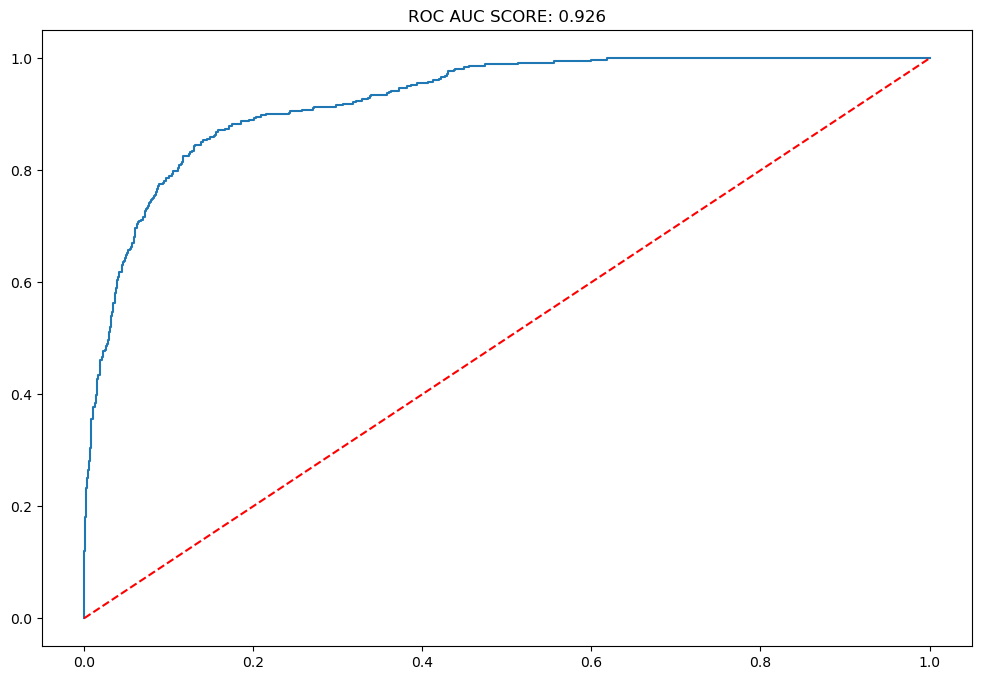

Save the model: Y/N y


In [109]:
score(XGBClassifier(**gscv2.best_params_), xtrain, ytrain, xtest, ytest)

In [110]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen Kappa
0,RandomForestClassifier(),0.901460,0.772549,0.515707,0.618524,0.564514
1,GaussianNB(),0.844282,0.497525,0.526178,0.511450,0.418917
2,BaggingClassifier(estimator=GaussianNB()),0.843066,0.493797,0.520942,0.507006,0.413765
3,AdaBoostClassifier(),0.893350,0.698997,0.547120,0.613803,0.552999
4,"XGBClassifier(base_score=None, booster=None, c...",0.891322,0.706522,0.510471,0.592705,0.531871
5,DecisionTreeClassifier(max_depth=5),0.897405,0.745247,0.513089,0.607752,0.551036
6,"RandomForestClassifier(criterion='entropy', ma...",0.901460,0.770428,0.518325,0.619718,0.565589
7,"XGBClassifier(base_score=None, booster=None, c...",0.901865,0.750000,0.549738,0.634441,0.579315


# Cross Validation

In [45]:
# Finalizing the model: XGB Classifier
# Checking for any overfitting

In [112]:
xgb = XGBClassifier(**gscv2.best_params_)
cross_val_score(X=xtrain, y=ytrain, estimator=xgb, cv=5)

array([0.90167258, 0.90116574, 0.89305626, 0.90369995, 0.90922921])

In [113]:
cvs = [0.90167258, 0.90116574, 0.89305626, 0.90369995, 0.90922921]

np.mean([0.90167258, 0.90116574, 0.89305626, 0.90369995, 0.90922921])

0.9017647480000001

In [ ]:
# This shows that there is low variance and low bias
# The model is not overfitting

# Final Model

In [115]:
xgb = XGBClassifier(**gscv2.best_params_)
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
pred = pd.DataFrame(xgb.predict(xtest))

In [124]:
pred.value_counts()

0    2186
1     280
Name: count, dtype: int64

In [117]:
xtest.iloc[1].to_list()

[1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.2,
 0.2,
 0.0,
 0.0,
 6.0,
 1.0,
 1.0,
 4.0,
 4.0,
 0.0,
 1.0]

In [120]:
t = [[1.0,0.0,0.0,0.0,3.0,0.0,0.2,0.2,0.0, 0.0, 6.0, 1.0, 1.0, 4.0, 4.0, 0.0, 1.0]]

xgb.predict_proba(t)[:,1][0]

0.0018887572

In [121]:
xgb.predict(t)

array([0])

In [ ]:
# The given record has been predict as class 0

In [122]:
data.loc[1, 'Revenue']

False

In [ ]:
# The original data is also the same.

The final model provides reasonably reliable predictions of the classes, even if it's not perfectly accurate.